<a href="https://colab.research.google.com/github/Iamsunil06/AI-ML-/blob/main/apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset (Binary Encoding):
    Bread  Butter   Eggs    Jam   Milk
0   True    True  False  False   True
1   True    True  False   True  False
2   True   False   True  False   True
3   True    True   True  False   True
4   True   False   True  False  False

Frequent Itemsets:
    support         itemsets
0      1.0          (Bread)
1      0.6         (Butter)
2      0.6           (Eggs)
3      0.6           (Milk)
4      0.6  (Bread, Butter)
5      0.6    (Eggs, Bread)
6      0.6    (Bread, Milk)

Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0     (Bread)    (Butter)                 1.0                 0.6      0.6   
1    (Butter)     (Bread)                 0.6                 1.0      0.6   
2      (Eggs)     (Bread)                 0.6                 1.0      0.6   
3     (Bread)      (Eggs)                 1.0                 0.6      0.6   
4     (Bread)      (Milk)                 1.0                 0.6      0.6   
5      (Mi

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


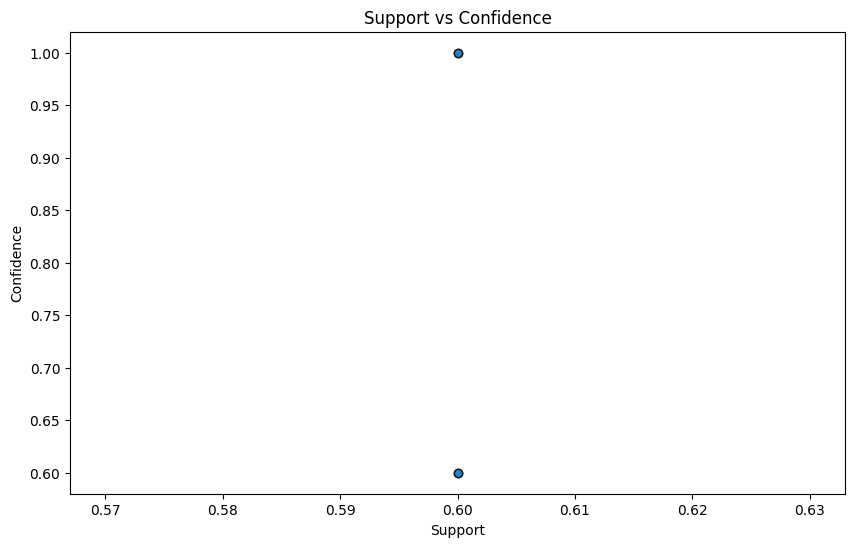

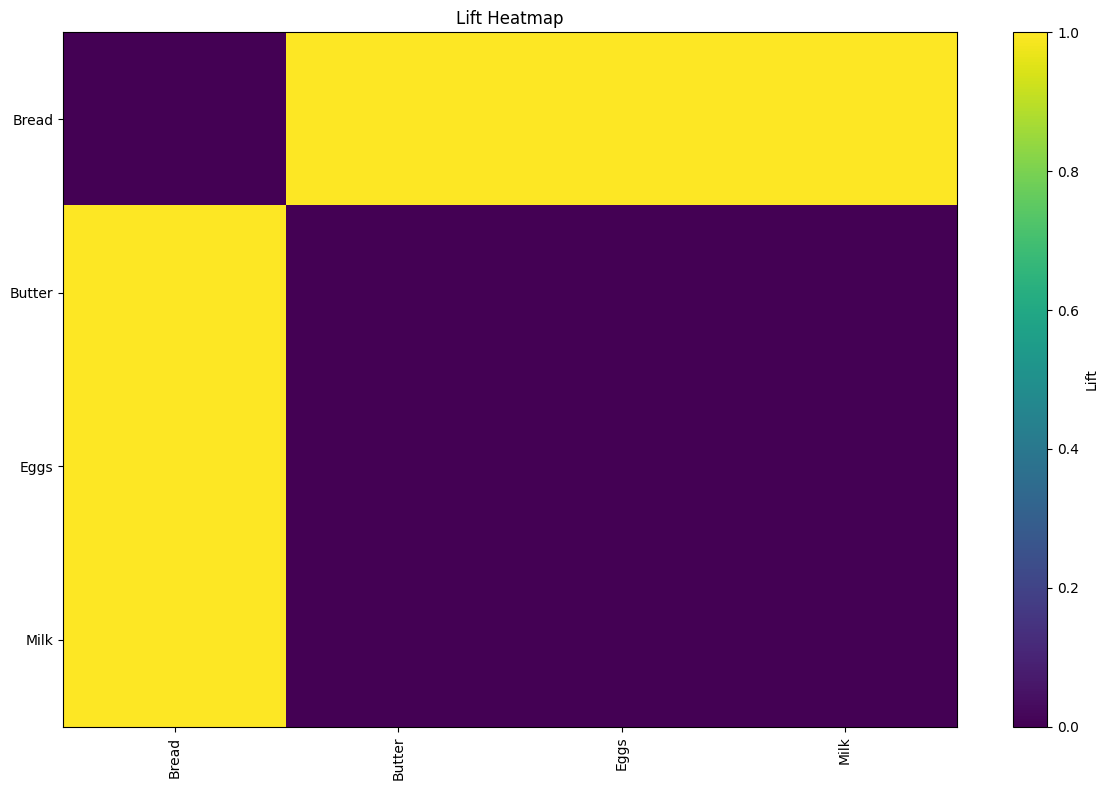

<Figure size 1000x600 with 0 Axes>

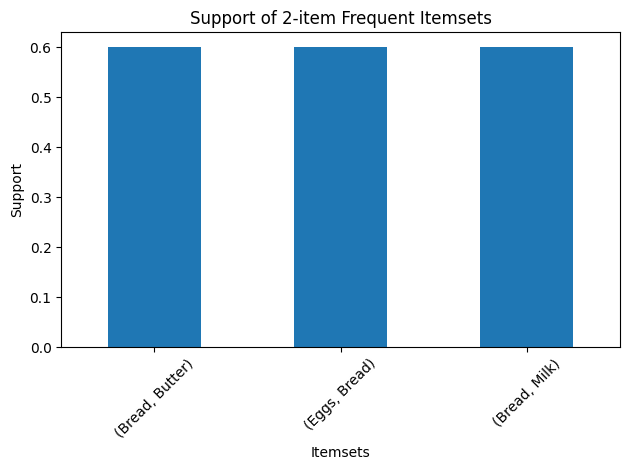

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset: List of transactions
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Jam'],
    ['Milk', 'Bread', 'Eggs'],
    ['Milk', 'Butter', 'Eggs', 'Bread'],
    ['Bread', 'Eggs']
]

# Convert transactions into a DataFrame using TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

print("Dataset (Binary Encoding):\n", df)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.5
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
min_confidence = 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=5)
print("\nAssociation Rules:\n", rules)

# Plot the support vs confidence for rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, edgecolors='k')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Plot heatmap of lift
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

lift_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)
plt.figure(figsize=(12, 8))
plt.title('Lift Heatmap')
plt.imshow(lift_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Lift')
plt.xticks(range(len(lift_matrix.columns)), lift_matrix.columns, rotation=90)
plt.yticks(range(len(lift_matrix.index)), lift_matrix.index)
plt.tight_layout()
plt.show()

# Plot bar chart for frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]
plt.figure(figsize=(10, 6))
frequent_itemsets.plot(kind='bar', x='itemsets', y='support', legend=False)
plt.title('Support of 2-item Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Sample:
   cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         x           s         n          t    p               f   
1         x           s         y          t    a               f   
2         b           s         w          t    l               f   
3         x           y         w          t    p               f   
4         x           s         g          f    n               f   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0            c         n          k           e  ...                      w   
1            c         b          k           e  ...                      w   
2            c         b          n           e  ...                      w   
3            c         n          n           e  ...                      w   
4            w         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                     

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)



Association Rules:
         antecedents                     consequents  antecedent support  \
0               (c)                             (b)            0.855244   
1               (b)                             (c)            0.947070   
2               (d)                             (b)            0.387494   
3               (b)                             (e)            0.947070   
4               (e)                             (b)            0.964549   
...             ...                             ...                 ...   
1114939   (w, y, s)     (t, b, e, k, c, f, n, o, p)            0.410881   
1114940   (o, y, s)     (t, b, e, k, c, f, n, w, p)            0.402511   
1114941   (c, s, k)     (t, b, y, e, f, n, w, o, p)            0.371000   
1114942      (t, y)  (b, k, s, c, p, f, n, w, o, e)            0.415559   
1114943      (y, k)  (t, b, s, c, p, f, n, w, o, e)            0.409527   

         consequent support   support  confidence      lift  representativity 

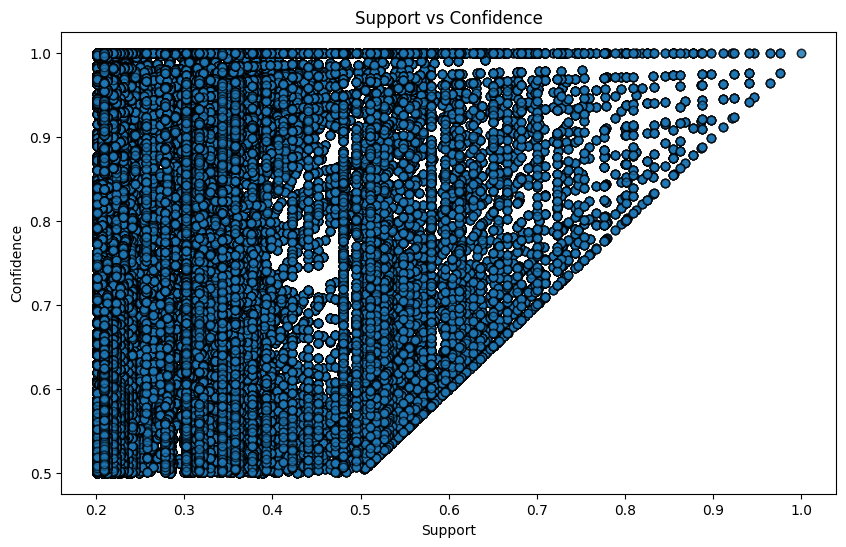

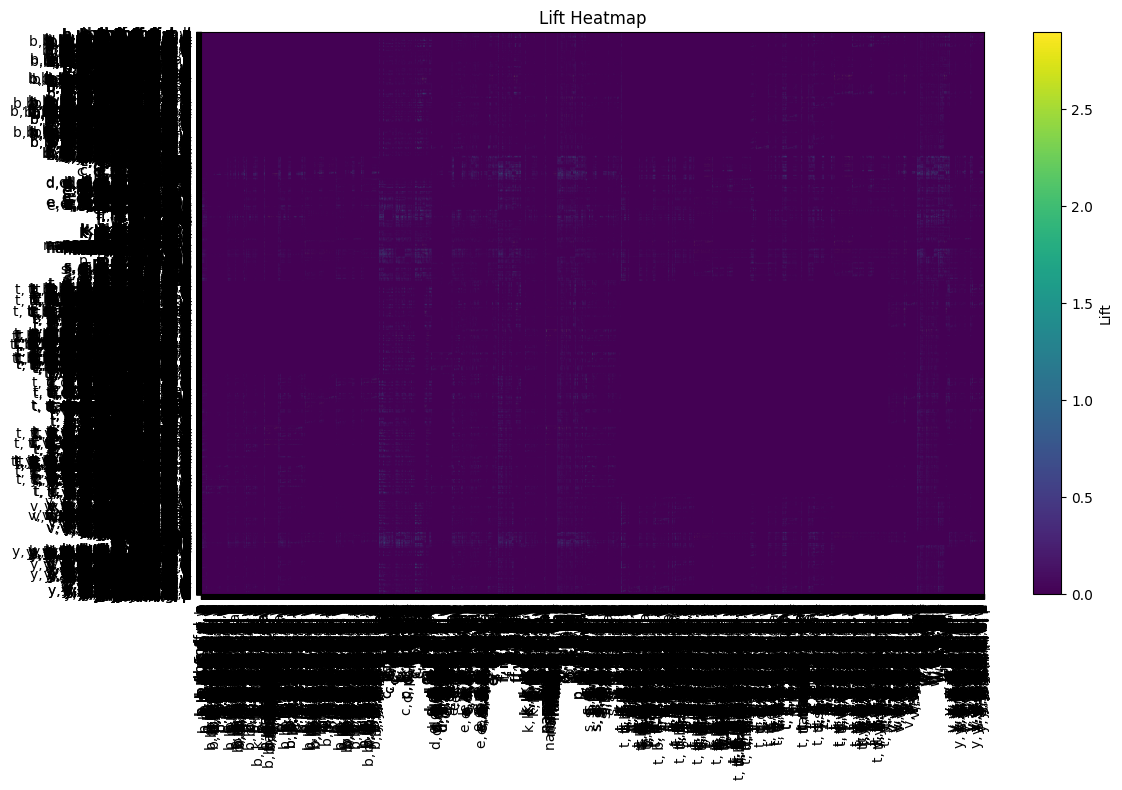

In [ ]:
from sklearn.datasets import fetch_openml
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load Mushroom dataset from sklearn
mushroom_data = fetch_openml(name='mushroom', version=1, as_frame=True)
df = mushroom_data.frame

# Display basic info
print("Dataset Sample:\n", df.head())
print("Shape of the dataset:", df.shape)

# Convert to transactional format
transactions = df.astype(str).values.tolist()

# Encode transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Apply Apriori algorithm
min_support = 0.2  # 20% minimum support
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
min_confidence = 0.5  # 50% minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=1)
print("\nAssociation Rules:\n", rules)

# Visualize support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, edgecolors='k')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Visualize lift with a heatmap
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

lift_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)
plt.figure(figsize=(12, 8))
plt.title('Lift Heatmap')
plt.imshow(lift_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Lift')
plt.xticks(range(len(lift_matrix.columns)), lift_matrix.columns, rotation=90)
plt.yticks(range(len(lift_matrix.index)), lift_matrix.index)
plt.tight_layout()
plt.show()
